In [34]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [35]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [83]:
#define time and speed (these are the labels)
time = torch.arange(0,20).float(); 
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

## Remember the 7 step process
1. Initialize the weights.
2. For each image, use these weights to predict whether it appears to be a 3 or a 7.
3. Based on these predictions, calculate how good the model is (its loss).
4. Calculate the gradient, which measures for each weight, how changing that weight would change the loss
5. Step (that is, change) all the weights based on that calculation.
6. Go back to the step 2, and repeat the process.
7. Iterate until you decide to stop the training process (for instance, because the model is good enough or you don't want to wait any longer).

In [84]:
#define a function for making the predictions (step #2)
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [85]:
#define a function for calculating the loss (step #3)
def mse(preds, targets): 
    return ((preds-targets)**2).mean()

In [86]:
#randonly initialise the parameters
params = torch.randn(3).requires_grad_()

In [87]:
#save the initialisation to view in the chart later
orig_params = params.clone()

In [88]:
#define a function that does steps 2 through 6
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [89]:
#Set the number of epochs and learning rate. Call apply_step for epoch number of times
epoch = 20
lr = 0.00001
for i in range(epoch): 
    preds = apply_step(params)

3352.24462890625
1176.8729248046875
765.2229614257812
687.322998046875
672.5787353515625
669.7855224609375
669.253662109375
669.1499633789062
669.1270751953125
669.1194458007812
669.1148681640625
669.11083984375
669.1068115234375
669.1029663085938
669.0989990234375
669.094970703125
669.0911254882812
669.0870971679688
669.0831909179688
669.079345703125


In [90]:
#define a function that displays the predictions

def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

In [91]:
#assign the params to the initial value for display purposes
params = orig_params.detach().requires_grad_()

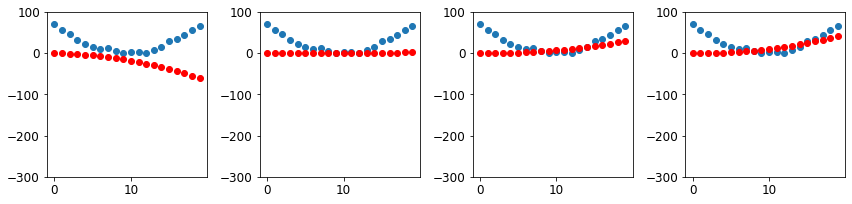

In [92]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: 
    show_preds(apply_step(params, False), ax)
plt.tight_layout()